In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [9]:
df = pd.read_csv('nyc_census_tobacco_new_new.csv')

In [14]:
# create new column in df for percentage of poverty level estimate for each tract
df['poverty_percent'] = (df['pov_level_estimate'] / df['population_estimate']) * 100
df

,GEOID,NAME,geometry,population_estimate,pov_level_estimate,med_inc_estimate,population_moe,pov_level_moe,med_inc_moe,census_tract,counts,poverty_percent
0,36081014700,"Census Tract 147, Queens County, New York","list(list(c(-73.913701, -73.912103, -73.911305...",2863,2862,71815,513,513,18034,36081014700,7,99.965072
1,36047058400,"Census Tract 584, Kings County, New York","list(list(c(-73.961028, -73.959777, -73.95878,...",3655,3655,67315,529,529,10294,36047058400,2,100.000000
2,36047055700,"Census Tract 557, Kings County, New York","list(list(c(-73.962787, -73.962645, -73.961543...",1834,1834,107410,324,324,37032,36047055700,2,100.000000
3,36005022101,"Census Tract 221.01, Bronx County, New York","list(list(c(-73.920125, -73.919696, -73.918592...",4030,3974,37200,832,830,15878,36005022101,2,98.610422
4,36081047000,"Census Tract 470, Queens County, New York","list(list(c(-73.780589, -73.778001, -73.777123...",3637,3635,50000,673,673,36794,36081047000,1,99.945010
...,...,...,...,...,...,...,...,...,...,...,...,...
1651,36047009002,"Census Tract 90.02, Kings County, New York","list(list(c(-73.997301, -73.996562, -73.996088...",1392,1381,53712,606,606,5890,36047009002,2,99.209770
1652,36061016002,"Census Tract 160.02, New York County, New York","list(list(c(-73.955275, -73.954817, -73.951609...",3522,2903,122688,869,855,36089,36061016002,1,82.424759
1653,36081016900,"Census Tract 169, Queens County, New York","list(list(c(-73.918676, -73.914462, -73.909711...",5893,5893,77027,695,695,15493,36081016900,7,100.000000
1654,36047035102,"Census Tract 351.02, Kings County, New York","list(list(c(-73.934058, -73.933888, -73.931119...",2659,2659,72955,499,499,40611,36047035102,6,100.000000


In [18]:
# create a T or F column for whether the tract is above the median poverty level
df['above_median_poverty'] = df['poverty_percent'] > df['poverty_percent'].median()
df

,GEOID,NAME,geometry,population_estimate,pov_level_estimate,med_inc_estimate,population_moe,pov_level_moe,med_inc_moe,census_tract,counts,poverty_percent,above_median_poverty
0,36081014700,"Census Tract 147, Queens County, New York","list(list(c(-73.913701, -73.912103, -73.911305...",2863,2862,71815,513,513,18034,36081014700,7,99.965072,True
1,36047058400,"Census Tract 584, Kings County, New York","list(list(c(-73.961028, -73.959777, -73.95878,...",3655,3655,67315,529,529,10294,36047058400,2,100.000000,True
2,36047055700,"Census Tract 557, Kings County, New York","list(list(c(-73.962787, -73.962645, -73.961543...",1834,1834,107410,324,324,37032,36047055700,2,100.000000,True
3,36005022101,"Census Tract 221.01, Bronx County, New York","list(list(c(-73.920125, -73.919696, -73.918592...",4030,3974,37200,832,830,15878,36005022101,2,98.610422,False
4,36081047000,"Census Tract 470, Queens County, New York","list(list(c(-73.780589, -73.778001, -73.777123...",3637,3635,50000,673,673,36794,36081047000,1,99.945010,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,36047009002,"Census Tract 90.02, Kings County, New York","list(list(c(-73.997301, -73.996562, -73.996088...",1392,1381,53712,606,606,5890,36047009002,2,99.209770,False
1652,36061016002,"Census Tract 160.02, New York County, New York","list(list(c(-73.955275, -73.954817, -73.951609...",3522,2903,122688,869,855,36089,36061016002,1,82.424759,False
1653,36081016900,"Census Tract 169, Queens County, New York","list(list(c(-73.918676, -73.914462, -73.909711...",5893,5893,77027,695,695,15493,36081016900,7,100.000000,True
1654,36047035102,"Census Tract 351.02, Kings County, New York","list(list(c(-73.934058, -73.933888, -73.931119...",2659,2659,72955,499,499,40611,36047035102,6,100.000000,True


In [20]:
# record above_median_poverty as 1 or 0
df['above_median_poverty'] = df['above_median_poverty'].astype(int)
df

,GEOID,NAME,geometry,population_estimate,pov_level_estimate,med_inc_estimate,population_moe,pov_level_moe,med_inc_moe,census_tract,counts,poverty_percent,above_median_poverty
0,36081014700,"Census Tract 147, Queens County, New York","list(list(c(-73.913701, -73.912103, -73.911305...",2863,2862,71815,513,513,18034,36081014700,7,99.965072,1
1,36047058400,"Census Tract 584, Kings County, New York","list(list(c(-73.961028, -73.959777, -73.95878,...",3655,3655,67315,529,529,10294,36047058400,2,100.000000,1
2,36047055700,"Census Tract 557, Kings County, New York","list(list(c(-73.962787, -73.962645, -73.961543...",1834,1834,107410,324,324,37032,36047055700,2,100.000000,1
3,36005022101,"Census Tract 221.01, Bronx County, New York","list(list(c(-73.920125, -73.919696, -73.918592...",4030,3974,37200,832,830,15878,36005022101,2,98.610422,0
4,36081047000,"Census Tract 470, Queens County, New York","list(list(c(-73.780589, -73.778001, -73.777123...",3637,3635,50000,673,673,36794,36081047000,1,99.945010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,36047009002,"Census Tract 90.02, Kings County, New York","list(list(c(-73.997301, -73.996562, -73.996088...",1392,1381,53712,606,606,5890,36047009002,2,99.209770,0
1652,36061016002,"Census Tract 160.02, New York County, New York","list(list(c(-73.955275, -73.954817, -73.951609...",3522,2903,122688,869,855,36089,36061016002,1,82.424759,0
1653,36081016900,"Census Tract 169, Queens County, New York","list(list(c(-73.918676, -73.914462, -73.909711...",5893,5893,77027,695,695,15493,36081016900,7,100.000000,1
1654,36047035102,"Census Tract 351.02, Kings County, New York","list(list(c(-73.934058, -73.933888, -73.931119...",2659,2659,72955,499,499,40611,36047035102,6,100.000000,1


In [25]:
%%R -i df

df <- df

In [27]:
%%R

# show columns in df
names(df)

 [1] "GEOID"                "NAME"                 "geometry"            
 [4] "population_estimate"  "pov_level_estimate"   "med_inc_estimate"    
 [7] "population_moe"       "pov_level_moe"        "med_inc_moe"         
[10] "census_tract"         "counts"               "poverty_percent"     
[13] "above_median_poverty"


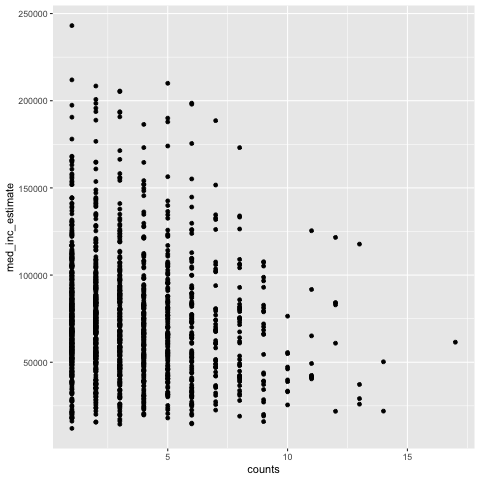

In [38]:
%%R

# plot med_income_estimate vs counts
df %>%
  ggplot(aes(x = counts, y = med_inc_estimate)) +
  geom_point() 

In [39]:
%%R

#linear regression med_inc_estimate ~ counts
model = lm(df$counts ~ df$med_inc_estimate)
summary(model)


Call:
lm(formula = df$counts ~ df$med_inc_estimate)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7344 -1.7076 -0.5188  1.0714 13.6694 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          3.833e+00  1.377e-01  27.827  < 2e-16 ***
df$med_inc_estimate -8.170e-06  1.679e-06  -4.867 1.24e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.31 on 1654 degrees of freedom
Multiple R-squared:  0.01412,	Adjusted R-squared:  0.01352 
F-statistic: 23.69 on 1 and 1654 DF,  p-value: 1.241e-06



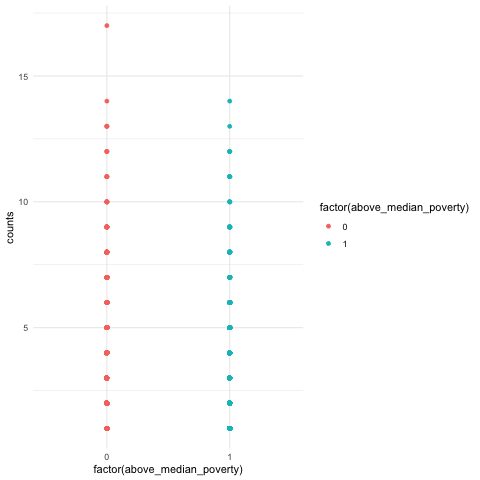

In [32]:
%%R

# plot count vs above_median_poverty in R
ggplot(df, aes(x=factor(above_median_poverty), y=counts, color=factor(above_median_poverty))) + 
    geom_point() +
    theme_minimal() 


In [33]:
%%R

poverty_a <- df %>% filter(above_median_poverty == 1)
poverty_b <- df %>% filter(above_median_poverty == 0)

t.test(poverty_a$counts, poverty_b$counts)


	Welch Two Sample t-test

data:  poverty_a$counts and poverty_b$counts
t = -3.0083, df = 1644.2, p-value = 0.002667
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5666262 -0.1193642
sample estimates:
mean of x mean of y 
 3.050725  3.393720 

